# Logistic Regression Project Tutorial

In [184]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)


# STEP 1) Connect to the database and convert it to a dataframe
resource_url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(resource_url, delimiter=';')

# STEP 2) Problem statement:
print("Problem statement: Given that we aim to create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit,\n "
      "the goal of the data analysing is identifyng existing customers who are more likely to take out a long-term deposit, and then model an alogirthm that\n "
      "will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.")

df.head()

Problem statement: Given that we aim to create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit,
 the goal of the data analysing is identifyng existing customers who are more likely to take out a long-term deposit, and then model an alogirthm that
 will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [185]:
#STEP 3) First data overiew: data status
df.info()

print(f"\n There are {df.isnull().any().sum()} columns with missing values in the database {', '.join(df.columns[df.isnull().any()])}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [186]:
# STEP 4) Managing missing or nul valures:

# 4.A) Find columns with non-varying values
non_varying_cols = [col for col in df.columns if df[col].nunique() == 1]
'''
1. `non_varying_cols = [col for col in df.columns if df[col].nunique() == 1]`:
  This line uses a list comprehension to iterate through each column (`col`) in the DataFrame (`df.columns`).
2. `df[col].nunique() == 1`: For each column, it checks if the number of unique values (`nunique()`) is equal to 1.
  If this condition is true, it means the column has only one unique value and is considered non-varying.
3. `[col for ... if ...]`: The list comprehension creates a list (`non_varying_cols`)
  containing the names of all columns that satisfy the condition (having only one unique value).
'''

df = df.drop(columns=non_varying_cols)

for col in df.columns:
    unique_values = df[col].unique()
    print(f"Columns and their unique values:\n \n Column: '{col}': {', '.join(map(str, unique_values))}")


print(f"\nAlthough in a first overview it seemed some variables had only one type of value,\n"  
      f"based on this more in-depth check we find {len(non_varying_cols)} columns with non-distinc values.\n"
"After analysing all the columns and respective values, we decide to just rename the columns 'default', 'contact', 'duration', 'campaign', 'pdays', 'previous' by a more descriptive label 'credit', 'contact_type', 'contact_duration', 'num_contacts', 'elapsed_days', 'previous_contacts'")

df.rename(columns={'default': 'has_debth', 'housing': 'housing_loans', 'loan': 'personal_loan', 'contact': 'contact_type', 'duration': 'contact_duration', 'campaign':'num_contacts','pdays':'elapsed_days', 'previous':'previous_contacts'}, inplace=True)

df.head()


Columns and their unique values:
 
 Column: 'age': 56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89
Columns and their unique values:
 
 Column: 'job': housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student
Columns and their unique values:
 
 Column: 'marital': married, single, divorced, unknown
Columns and their unique values:
 
 Column: 'education': basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate
Columns and their unique values:
 
 Column: 'default': no, unknown, yes
Columns and their unique values:
 
 Column: 'housing': no, yes, unknown
Columns and their unique values:
 
 Column: 'loan': no, yes,

,age,job,marital,education,has_debth,housing_loans,personal_loan,contact_type,month,day_of_week,...,num_contacts,elapsed_days,previous_contacts,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [187]:
# STEP 4) Overall duplicates control:
print(f"Number of total rows before dropping duplicates: {df.shape[0]}")

#  STEP 4.B) Drop all duplicate occurrences
df.drop_duplicates(keep=False, inplace=True)
print(f"Number of total rows after dropping duplicates: {df.shape[0]}")
print(f"Total number of duplicated rows after dropping duplicates: {len(df[df.duplicated(keep=False)])}")

Number of total rows before dropping duplicates: 41188


Number of total rows after dropping duplicates: 41164
Total number of duplicated rows after dropping duplicates: 0


In [188]:
# STEP 5) Missing data control:

# STEP 5.A) Identifying 'nonexistent' or 'unknown' values

print("Althought there are no Nans in the database, several columns store 'unkown' and 'nonexistent' values,\n"
"that will be turned into Classes further so we can use this as an 'ace up the sleeve' if the prediction \n"
"is not performing good enough (even after trying out all the optimization strategies).\n")


for col in df.columns:
    unique_values = df[col].unique()
    print(f"Columns and their unique values:\n \n Column:: '{col}': {', '.join(map(str, unique_values))}")

Althought there are no Nans in the database, several columns store 'unkown' and 'nonexistent' values,
that will be turned into Classes further so we can use this as an 'ace up the sleeve' if the prediction 
is not performing good enough (even after trying out all the optimization strategies).

Columns and their unique values:
 
 Column:: 'age': 56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89
Columns and their unique values:
 
 Column:: 'job': housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student
Columns and their unique values:
 
 Column:: 'marital': married, single, divorced, unknown
Columns and their unique values:
 
 Column:: 'education': basic.4y

In [189]:
# STEP 5) Missing data control:

# STEP 5.B) Giving dimension to missing values under 'nonexistent' or 'unknown' values/variables

for column in df.columns:
    total_values = df[column].count()
    unknown_count = df[column][df[column] == 'unknown'].count()
    nonexistent_count = df[column][df[column] == 'nonexistent'].count()
    total_missing = unknown_count + nonexistent_count

    if total_missing > 0:
        print(f"Column '{column}':")
        print(f"  - Total values: {total_values}")
        print(f"  - 'unknown' count: {unknown_count}")
        print(f"  - 'nonexistent' count: {nonexistent_count}")
        print(f"  - Total missing: {total_missing}")
        print(f"  - Proportion of missing data: {total_missing/total_values:.2%}\n")


print(f"Strategy after a more in-depth assessment of the proportion of missing values ('unknown' and 'nonexistent'):\n "
      f"Below 20% of missing values: Considering them as one more category within the same variable they belong to. \n"
      f"Above 20% of missing values: Creating binary categories out from the variables where the proportion of missing values\n"
      f"is relevant (such as 'poutcome' with +86% of 'nonexistent' entries).")

Column 'job':
  - Total values: 41164
  - 'unknown' count: 330
  - 'nonexistent' count: 0
  - Total missing: 330
  - Proportion of missing data: 0.80%

Column 'marital':
  - Total values: 41164
  - 'unknown' count: 80
  - 'nonexistent' count: 0
  - Total missing: 80
  - Proportion of missing data: 0.19%

Column 'education':
  - Total values: 41164
  - 'unknown' count: 1729
  - 'nonexistent' count: 0
  - Total missing: 1729
  - Proportion of missing data: 4.20%

Column 'has_debth':
  - Total values: 41164
  - 'unknown' count: 8595
  - 'nonexistent' count: 0
  - Total missing: 8595
  - Proportion of missing data: 20.88%

Column 'housing_loans':
  - Total values: 41164
  - 'unknown' count: 990
  - 'nonexistent' count: 0
  - Total missing: 990
  - Proportion of missing data: 2.41%

Column 'personal_loan':
  - Total values: 41164
  - 'unknown' count: 990
  - 'nonexistent' count: 0
  - Total missing: 990
  - Proportion of missing data: 2.41%

Column 'poutcome':
  - Total values: 41164
  - 'u

In [190]:
# STEP 5) Missing data control:

# STEP 5.C) Creating binary class variables with variables that have + 5% missing values as 'nonexistent' or 'unknown' for further modeling phases
df["missing_has_debth"] = (df["has_debth"] == "unknown").astype(int)

df["missing_poutcome"] = (df["poutcome"] == "nonexistent").astype(int)

missing_values_in_poutcome = df[df["poutcome"] == "nonexistent"]["poutcome"].count()
print("Total 'hidden' missing values in 'poutcome':", missing_values_in_poutcome)

missing_values_has_debth = df[df["has_debth"] == "unknown"]["has_debth"].count()
print("Total 'hidden' missing values in 'has_debth':", missing_values_has_debth)

Total 'hidden' missing values in 'poutcome': 35539
Total 'hidden' missing values in 'has_debth': 8595


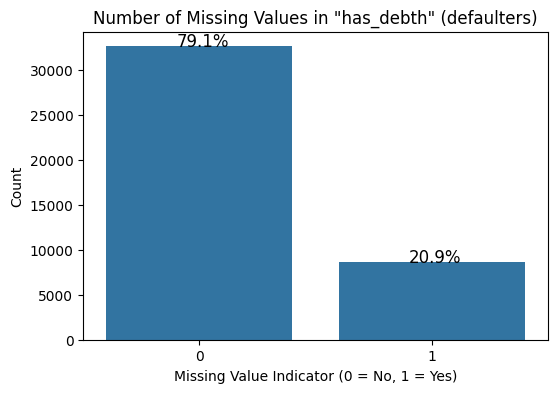

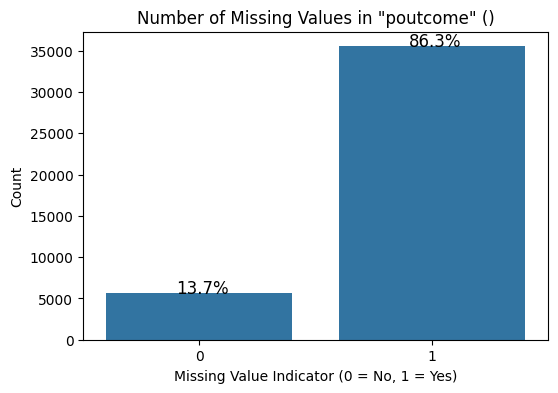

In [191]:
# STEP 5) Missing data control:

# STEP 5.D) Visualizing the binary variables with + 20% missing values: "missing_has_debt" and "missing_poutcome"
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_binary_with_percentage(data_frame, column_name, plot_title):
    """Plots a binary variable with percentage labels on the bars."""
    figure, axes = plt.subplots(figsize=(6, 4))
    sns.countplot(x=column_name, data=data_frame, ax=axes)
    plt.title(plot_title)
    plt.xlabel('Missing Value Indicator (0 = No, 1 = Yes)')
    plt.ylabel('Count')

    total_count = len(data_frame[column_name])
    for patch in axes.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height()/total_count)
        horizontal_position = patch.get_x() + patch.get_width() / 2 - 0.1
        vertical_position = patch.get_y() + patch.get_height() + 5  
        axes.annotate(percentage, (horizontal_position, vertical_position), size = 12)  

    plt.show()


plot_binary_with_percentage(df, 'missing_has_debth', 'Number of Missing Values in "has_debth" (defaulters)')


plot_binary_with_percentage(df, 'missing_poutcome', 'Number of Missing Values in "poutcome" ()')


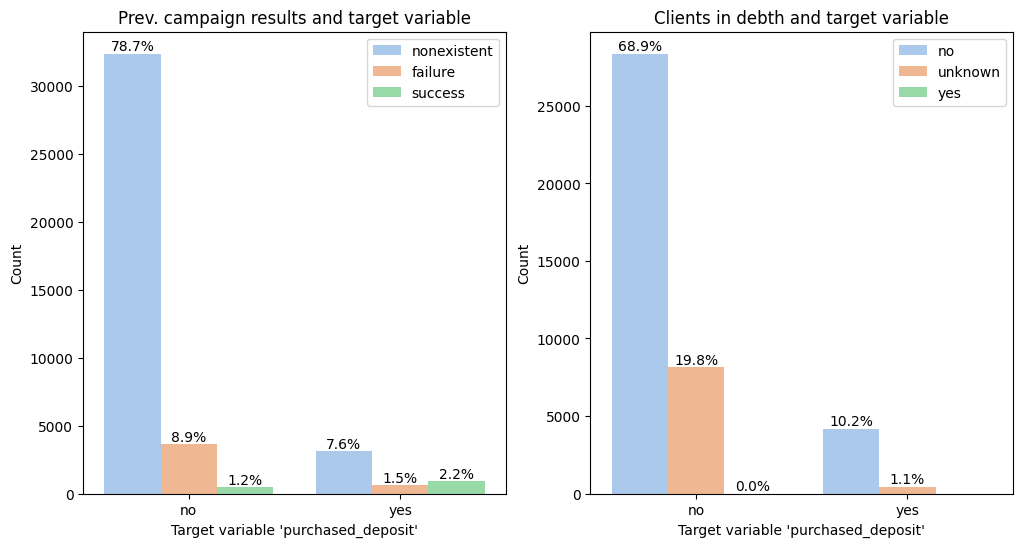


 Strategy after a more in-depth review on the relationship between the values with +20% missing values with the target variable:
Considering the possibility of omitting 'poutcome' variable from further anaylsis if the algorythm doesn't perform well later
since there are just 7.6% of clients who purchased the deposit for whom there is not data about previous campaigns.
Keeping the variable 'has_debth' since the 'unknown' values where 'purchased_deposit' is `yes`is not relevant (1,1%).


In [192]:
# STEP 5) Missing data control:

# STEP 5.E) Relating the values with + 20% missing values ("has_debth" and "poutcome") with the target variable

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = df.rename(columns={'y': 'purchased_deposit'})  


fig, axis = plt.subplots(1, 2, figsize = (12, 6))


def add_percentage_labels(ax, data, x_col, hue_col):
    """Adds percentage labels above bars in a countplot."""
    total = len(data) 

    for container in ax.containers:
        for i, p in enumerate(container.patches):
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height()

            percentage = '{:.1f}%'.format(100 * p.get_height() / total) 
            ax.annotate(percentage, (x, y), size=10, ha='center', va='bottom')


sns.countplot(ax = axis[0], x='purchased_deposit', hue='poutcome', palette='pastel', data=df)
axis[0].set_title('Prev. campaign results and target variable')
axis[0].set_xlabel("Target variable 'purchased_deposit'") 
axis[0].set_ylabel('Count')
axis[0].legend()
add_percentage_labels(axis[0], df, 'purchased_deposit', 'poutcome') 


sns.countplot(ax = axis[1], x='purchased_deposit', hue='has_debth', palette='pastel', data=df)
axis[1].set_title("Clients in debth and target variable") 
axis[1].set_xlabel("Target variable 'purchased_deposit'") 
axis[1].set_ylabel('Count')
axis[1].legend()
add_percentage_labels(axis[1], df, 'purchased_deposit', 'has_debth') 


plt.show()


print("\n Strategy after a more in-depth review on the relationship between the values with +20% missing values with the target variable:\n"
"Considering the possibility of omitting 'poutcome' variable from further anaylsis if the algorythm doesn't perform well later\n"
"since there are just 7.6% of clients who purchased the deposit for whom there is not data about previous campaigns.\n"
"Keeping the variable 'has_debth' since the 'unknown' values where 'purchased_deposit' is `yes`is not relevant (1,1%).")

In [193]:
# STEP 6) First data statistical overiew: Descriptive analysis and first outlier overview

# 6.A) Descriptive analysis observations:

print(f"Based on a first overview of a descriptive statistical analysis, we observe that the variable 'elapsed_days' goes from 0 to 999 days and all the quantiles are in 999 days.\n"
"So clearly further in-depth analysis for this variable should be conducted in order to decide wether keeping the variable is convinient or might distort the model.\n"
"There are is also a remarkable prominence of the upper outliners in for contact_duration (ranging from 258 seconds to 4918 seconds), \n"
"of the upper outliers for num_contacts (between 1 and 56 contacts to one unique client), and of the upper outliers for 'previous_contacts',\n"
"which will be sized below to understand the specific weight that these outliers have in relation to the rest of the records.\n")
df.describe()

Based on a first overview of a descriptive statistical analysis, we observe that the variable 'elapsed_days' goes from 0 to 999 days and all the quantiles are in 999 days.
So clearly further in-depth analysis for this variable should be conducted in order to decide wether keeping the variable is convinient or might distort the model.
There are is also a remarkable prominence of the upper outliners in for contact_duration (ranging from 258 seconds to 4918 seconds), 
of the upper outliers for num_contacts (between 1 and 56 contacts to one unique client), and of the upper outliers for 'previous_contacts',
which will be sized below to understand the specific weight that these outliers have in relation to the rest of the records.



,age,contact_duration,num_contacts,elapsed_days,previous_contacts,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,missing_has_debth,missing_poutcome
count,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000
mean,40.023540,258.346638,2.568166,962.454159,0.173064,0.081958,93.575775,-40.503127,3.621296,5167.033828,0.208799,0.863351
std,10.420109,259.331402,2.770623,186.963307,0.495028,1.570805,0.578838,4.627522,1.734427,72.251200,0.406455,0.343480
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,1.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000


In [194]:
# STEP 6) First data overiew: Descriptive analysis and first outlier overview

# 6.B) First outlier overview

import pandas as pd
import numpy as np

print("This function zooms in all the potential outliers of the database, giving them and specific weight on the database.\n"
"pointing out that further in-depth analysis of outliers should be done on the variables with + 5% of upper and/or lower outliers,\n"
"(excluding the Binary Indicator variables 'missing_has_debth' and 'missing_poutcome' that have been created for further diferentiation of missing values.\n")

def describe_outliers(df):
    """
    Based on the describe() analysis, this function finds potential outliers in numerical columns (excluding 'host_id' and 'id')
    and explains why they might be outliers, including the number of rows and first the 5 of upper/lower outliers.

    """
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    exclude_cols = ['host_id', 'id']
    num_cols = [col for col in num_cols if col not in exclude_cols]

    for col in num_cols:
        desc = df[col].describe()
        Q1 = desc['25%']
        Q3 = desc['75%']
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        upper_outliers = df[df[col] > upper_bound][col].tolist()
        lower_outliers = df[df[col] < lower_bound][col].tolist()

        outliers = upper_outliers + lower_outliers

        if outliers:
            print(f"Column '{col}':")
            print(f"  - Applying the rule: 'Comparing min/max to 25%/75% percentiles'")
            print(f"  - Minimum: {desc['min']}, Maximum: {desc['max']}")
            print(f"  - 25% percentile: {Q1}, 75% percentile: {Q3}")
            print(f"  - Difference (min - 25%): {round(desc['min'] - Q1, 4)}")
            print(f"  - Difference (max - 75%): {round(desc['max'] - Q3, 4)}")
            print(f"  - Potential upper outliers (first 5 or all): {upper_outliers[:5]}")
            print(f"  - Potential lower outliers (first 5 or all): {lower_outliers[:5]}")
            print(f"  - Potential number of upper outliers: {len(upper_outliers)}")
            print(f"  - Proportion of potential upper outliers: {len(upper_outliers) / df.shape[0]:.2%}")
            print(f"  - Potential number of lower outliers: {len(lower_outliers)}")
            print(f"  - Proportion of potential lower outliers: {len(lower_outliers)/df.shape[0]:.2%}\n")

describe_outliers(df)


This function zooms in all the potential outliers of the database, giving them and specific weight on the database.
pointing out that further in-depth analysis of outliers should be done on the variables with + 5% of upper and/or lower outliers,
(excluding the Binary Indicator variables 'missing_has_debth' and 'missing_poutcome' that have been created for further diferentiation of missing values.

Column 'age':
  - Applying the rule: 'Comparing min/max to 25%/75% percentiles'
  - Minimum: 17.0, Maximum: 98.0
  - 25% percentile: 32.0, 75% percentile: 47.0
  - Difference (min - 25%): -15.0
  - Difference (max - 75%): 51.0
  - Potential upper outliers (first 5 or all): [70, 76, 73, 88, 88]
  - Potential lower outliers (first 5 or all): []
  - Potential number of upper outliers: 467
  - Proportion of potential upper outliers: 1.13%
  - Potential number of lower outliers: 0
  - Proportion of potential lower outliers: 0.00%

Column 'contact_duration':
  - Applying the rule: 'Comparing min/ma

In [195]:
# STEP 6) Data Understanding:

# 6.C) Univariate Categorical Analysis: categories value count overview

def categorical_value_counts(df):
    """
    Executes value counts for all categorical variables in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        None: Prints the value counts for each categorical variable.
    """
    for column in df.select_dtypes(include=['object']).columns:
        print(f"Value counts for column '{column}':\n{df[column].value_counts()}\n")

categorical_value_counts(df)

Value counts for column 'job':
job
admin.           10416
blue-collar       9252
technician        6735
services          3965
management        2924
retired           1716
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     24914
single      11560
divorced     4610
unknown        80
Name: count, dtype: int64

Value counts for column 'education':
education
university.degree      12160
high.school             9509
basic.9y                6045
professional.course     5237
basic.4y                4176
basic.6y                2290
unknown                 1729
illiterate                18
Name: count, dtype: int64

Value counts for column 'has_debth':
has_debth
no         32566
unknown     8595
yes            3
Name: count, dtype: int64

Value counts for column 'housing_loans':
housing_loans
yes        21566
no         18608


In [196]:
# Exe reset: 

#STEP 1) Connect to the database and convert it to a dataframe
resource_url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(resource_url, delimiter=';')
df.rename(columns={'default': 'has_debth', 'housing': 'housing_loan', 'loan': 'personal_loans', 'contact': 'contact_type', 'duration': 'contact_duration', 'campaign':'num_contacts','pdays':'elapsed_days', 'previous':'previous_contacts'}, inplace=True)


# STEP 4) Overall duplicates control:
print(f"Number of total rows before dropping duplicates: {df.shape[0]}")

#  STEP 4.B) Drop all duplicate occurrences
df.drop_duplicates(keep=False, inplace=True)
print(f"Number of total rows after dropping duplicates: {df.shape[0]}")
print(f"Total number of duplicated rows after dropping duplicates: {len(df[df.duplicated(keep=False)])}")


# STEP 5.B) Creating binary class variables with + 5% missing values 'nonexistent' or 'unknown'
df["missing_has_debth"] = (df["has_debth"] == "unknown").astype(int)
df["missing_poutcome"] = (df["poutcome"] == "nonexistent").astype(int) + (df["poutcome"] == "failure").astype(int)

df = df.rename(columns={'y': 'purchased_deposit'})  



df.head()

Number of total rows before dropping duplicates: 41188
Number of total rows after dropping duplicates: 41164
Total number of duplicated rows after dropping duplicates: 0


,age,job,marital,education,has_debth,housing_loan,personal_loans,contact_type,month,day_of_week,...,previous_contacts,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,purchased_deposit,missing_has_debth,missing_poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

 CONCLUSION: 
We can observe the most common client profile is between their middle 20's and their 60'2
holds a business-company related role such as admin, blue-collar, techinicians or managers (+70%),
more than 60% are married and nearly 30% count with a university degree.
 In terms of their credit-profile, while most of the clients (+80%) have a personal loan,
they are nearly equally distributed between having and not having a house loan.


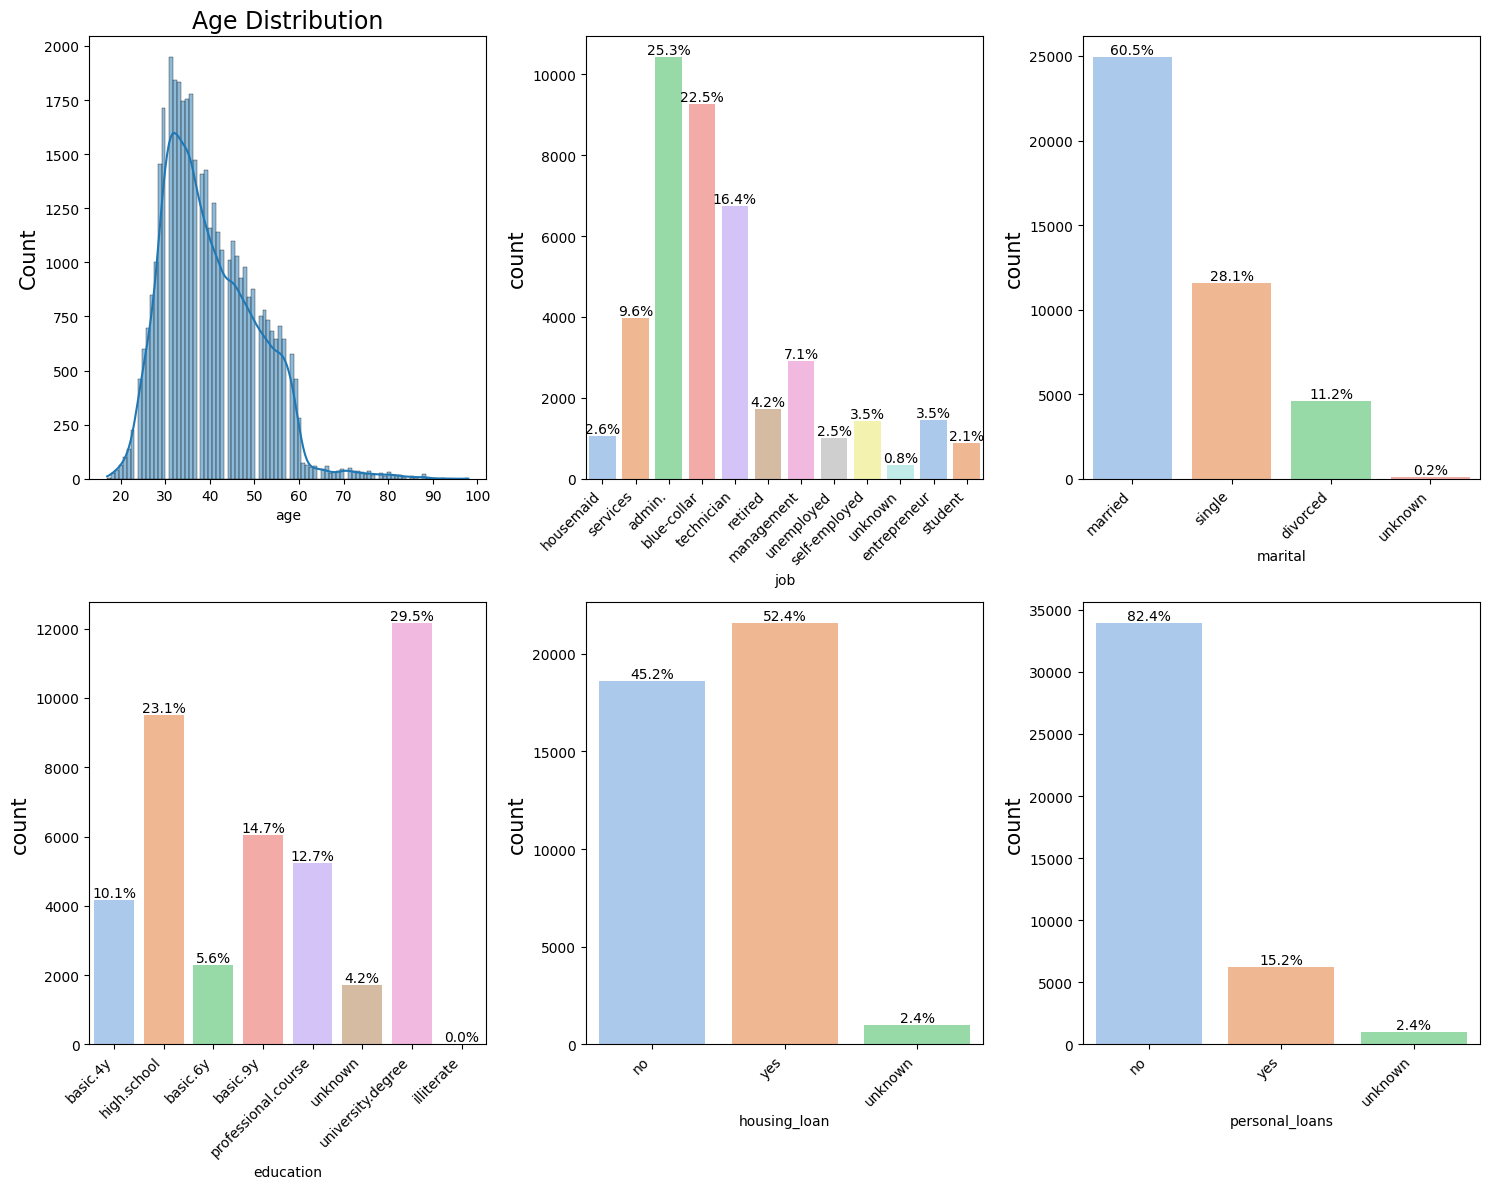

In [197]:
# STEP 6) Data Understanding:

# 6.D) Univariate Categorical Analysis: client-profile related variables overview

!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


client_categorical_cols = ["job", "marital", "education", "housing_loan", "personal_loans", "has_debth"]

fig, axis = plt.subplots(2, 3, figsize=(15, 12))

def add_percentage_labels(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')


ax_age = axis[0, 0]

# Using Freedman-Diaconis rule for binning
iqr = np.percentile(df['age'], 75) - np.percentile(df['age'], 25)
bin_width = 2 * iqr / (len(df['age']) ** (1 / 3))
num_bins = int((df['age'].max() - df['age'].min()) / bin_width)

sns.histplot(ax=ax_age, data=df, x="age", bins=num_bins, kde=True, palette="pastel", legend=False)


ax_age.set_title("Age Distribution", fontsize=17)
ax_age.set_ylabel(ax_age.get_ylabel(), fontsize=15)

subplot_positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]  # Shifted positions

def add_percentage_labels_generic(ax, total):
    """Adds percentage labels above each bar in a countplot."""
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')


for i, (col, position) in enumerate(zip(client_categorical_cols, subplot_positions)):
    row, col_index = position
    ax = sns.countplot(ax=axis[row, col_index], data=df, x=col, palette='pastel', hue=col, legend=False)
    axis[row, col_index].set_xticklabels(axis[row, col_index].get_xticklabels(), rotation=45, horizontalalignment='right')
    total = len(df[col])
    add_percentage_labels_generic(ax, total)  

    if col == "missing_has_debth":
        ax.set_xticklabels(["0 = not missing", "1 = Missing values"])  
    elif col == "missing_poutcome":
        ax.set_xticklabels(["0 = Not Missing", "1 = Missing values"])  

    ax.set_ylabel(ax.get_ylabel(), fontsize=15)
    ax.set_title(ax.get_title(), fontsize=17)

print("\n CONCLUSION: \n"
f"We can observe the most common client profile is between their middle 20's and their 60'2\n"
f"holds a business-company related role such as admin, blue-collar, techinicians or managers (+70%),\n"
f"more than 60% are married and nearly 30% count with a university degree.\n "
"In terms of their credit-profile, while most of the clients (+80%) have a personal loan,\n"
"they are nearly equally distributed between having and not having a house loan.")

plt.tight_layout()
plt.show()

CONCLUSION:
After reviewing the contact-related variables and confirming the previous outlier observations,
we can clearly see in 'elapsed_days' that most of the clients (+96%) where contacted after 999 days past the first campaign.
If this variable is not correlated to the target variable as we will assess further, we will omit 'elapsed_days' in further phases.
Although the outliers for the other contact-related variables are visibile here, we will keep them as they are
in order to better assess their correlation to the target variable and take more informed decisions further.


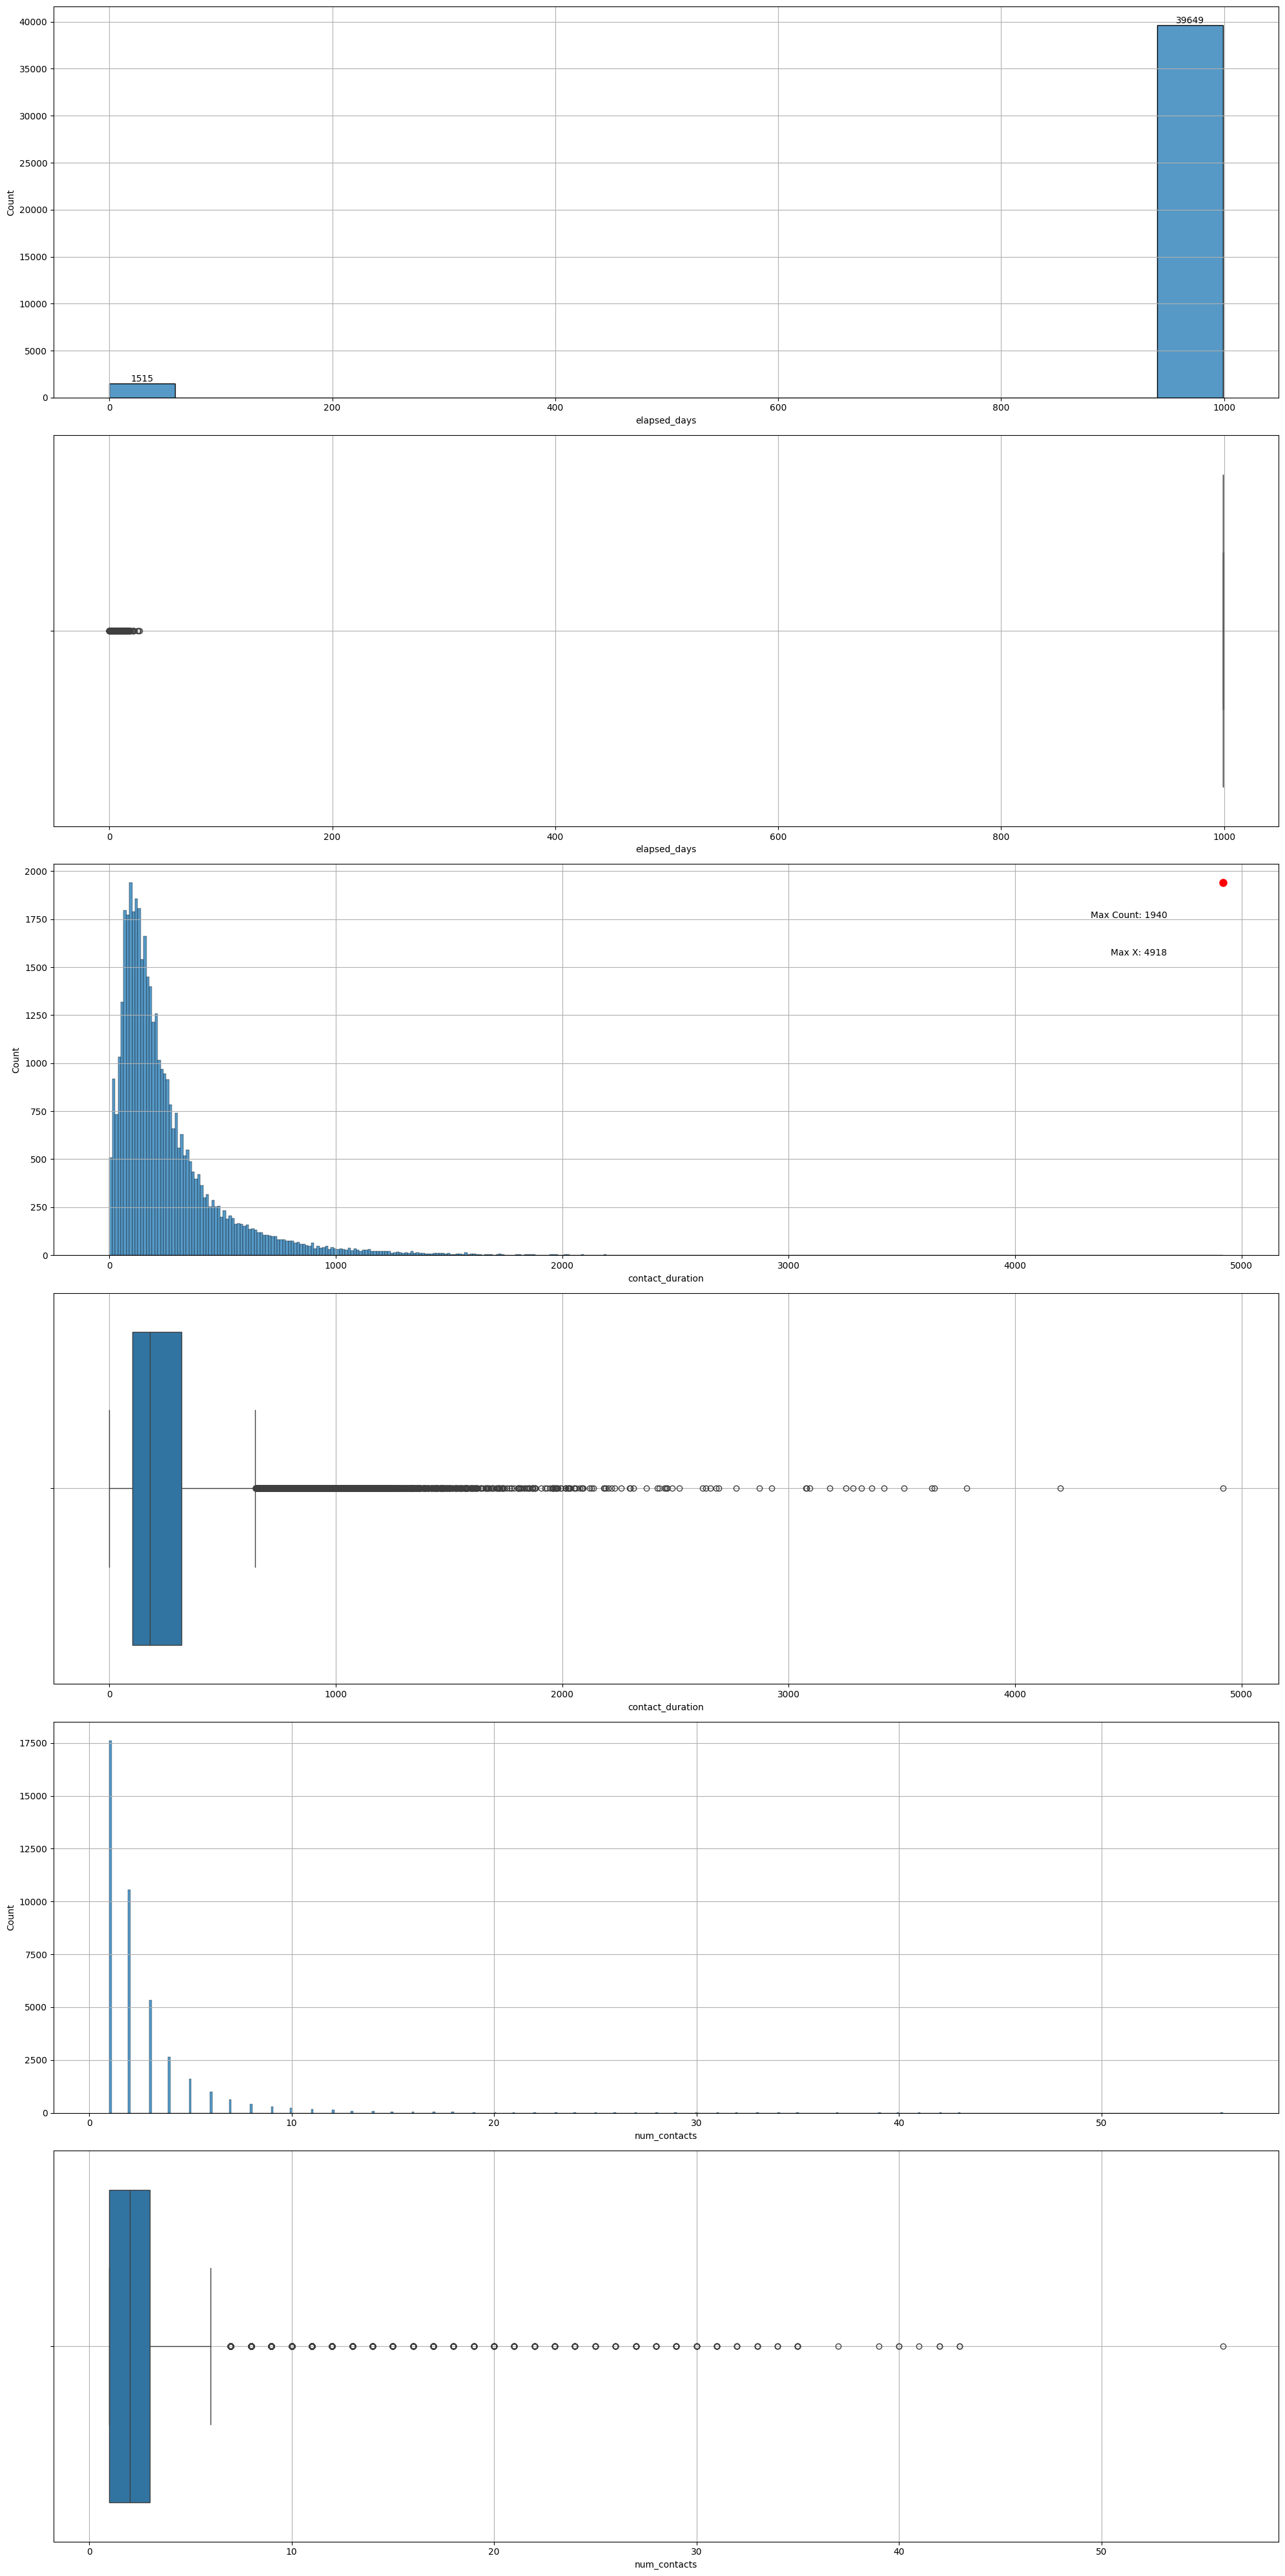

In [198]:
# STEP 6) Data Understanding:

# 6.E) Univariate Numerical Analysis: contact-related variables overview

import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(6, figsize = (20, 40))

ax = sns.histplot(ax=axis[0], data=df, x="elapsed_days")

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)
sns.boxplot(ax = axis[1], data = df, x = "elapsed_days")


ax = sns.histplot(ax=axis[2], data=df, x="contact_duration")


max_count = max(p.get_height() for p in ax.patches)
max_x = df['contact_duration'].max()

ax.annotate(f'Max Count: {int(max_count)}', (max_x * 0.95, max_count * 0.9),  
            ha='right', va='bottom', fontsize=10)

ax.annotate(f'Max X: {int(max_x)}', (max_x * 0.95, max_count * 0.8), 
            ha='right', va='bottom', fontsize=10)


ax.plot(max_x, max_count, 'ro', markersize=8)

sns.boxplot(ax = axis[3], data = df, x = "contact_duration")

sns.histplot(ax = axis[4], data = df, x = "num_contacts")
sns.boxplot(ax = axis[5], data = df, x = "num_contacts")


for ax in axis.flat:
    ax.grid(True, which='both')  


print("CONCLUSION:\n"
f"After reviewing the contact-related variables and confirming the previous outlier observations,\n"
"we can clearly see in 'elapsed_days' that most of the clients (+96%) where contacted after 999 days past the first campaign.\n"
"If this variable is not correlated to the target variable as we will assess further, we will omit 'elapsed_days' in further phases.\n"
"Although the outliers for the other contact-related variables are visibile here, we will keep them as they are\n"
"in order to better assess their correlation to the target variable and take more informed decisions further.")

plt.tight_layout()

# Mostrar el plot
plt.show()

In [199]:
# STEP 7) Scaling the data

# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

total_data = df

total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["has_debth_n"] = pd.factorize(total_data["has_debth"])[0]
total_data["housing_loan_n"] = pd.factorize(total_data["housing_loan"])[0]
total_data["personal_loans_n"] = pd.factorize(total_data["personal_loans"])[0]
total_data["contact_type_n"] = pd.factorize(total_data["contact_type"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["purchased_deposit_n"] = pd.factorize(total_data["purchased_deposit"])[0]
num_variables = ["job_n", "marital_n", "education_n", "has_debth_n", "housing_loan_n", "personal_loans_n", "contact_type_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "contact_duration", "num_contacts", "elapsed_days", "previous_contacts", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "purchased_deposit_n"]

# Applying the scaler: 
scaler = MinMaxScaler() 
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,job_n,marital_n,education_n,has_debth_n,housing_loan_n,personal_loans_n,contact_type_n,month_n,day_of_week_n,poutcome_n,...,contact_duration,num_contacts,elapsed_days,previous_contacts,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,purchased_deposit_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [200]:
# STEP 8: Data Split 

import pandas as pd
from sklearn.model_selection import train_test_split



X = total_data_scal.drop("purchased_deposit_n", axis = 1)
y = total_data_scal["purchased_deposit_n"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [201]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32931 entries, 6100 to 15801
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_n              32931 non-null  float64
 1   marital_n          32931 non-null  float64
 2   education_n        32931 non-null  float64
 3   has_debth_n        32931 non-null  float64
 4   housing_loan_n     32931 non-null  float64
 5   personal_loans_n   32931 non-null  float64
 6   contact_type_n     32931 non-null  float64
 7   month_n            32931 non-null  float64
 8   day_of_week_n      32931 non-null  float64
 9   poutcome_n         32931 non-null  float64
 10  age                32931 non-null  float64
 11  contact_duration   32931 non-null  float64
 12  num_contacts       32931 non-null  float64
 13  elapsed_days       32931 non-null  float64
 14  previous_contacts  32931 non-null  float64
 15  emp.var.rate       32931 non-null  float64
 16  cons.price.idx     32931

In [202]:
# STEP 9 (10 Features): Feature selection using ANOVA as the most appropriate method for selecting features when the target variable is categorical binary 

import pandas as pd
from sklearn.feature_selection import f_classif, SelectKBest

# Setting the selection method to Anova
anova_selection_model = SelectKBest(f_classif, k = 10)

# Training the train sample with Anova
X_train_sel_anova = anova_selection_model.fit(X_train, y_train) 

# Getting the selected features after Anova:
selected_features_anova = X_train.columns[X_train_sel_anova.get_support()]

selected_columns_anova = [col for col in X_train.columns if col in selected_features_anova] 


print(f"Selected features using Anova: {', '.join(selected_columns_anova)}\n\n")

ix = anova_selection_model.get_support()

df_X_train_sel_anova = pd.DataFrame(anova_selection_model.transform(X_train), columns = X_train.columns.values[ix])

df_X_test_sel_anova = pd.DataFrame(anova_selection_model.transform(X_test), columns = X_test.columns.values[ix])

df_X_train_sel_anova.head()

Selected features using Anova: contact_type_n, month_n, poutcome_n, contact_duration, elapsed_days, previous_contacts, emp.var.rate, cons.price.idx, euribor3m, nr.employed




,contact_type_n,month_n,poutcome_n,contact_duration,elapsed_days,previous_contacts,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,0.0,0.000000,0.0,0.051444,1.0,0.0,0.937500,0.698753,0.957379,0.859735
1,0.0,0.000000,0.0,0.022570,1.0,0.0,0.937500,0.698753,0.957379,0.859735
2,1.0,0.222222,0.0,0.034770,1.0,0.0,1.000000,0.669135,0.981410,1.000000
3,1.0,0.777778,0.0,0.049817,1.0,0.0,0.333333,0.455183,0.002040,0.170510
4,1.0,0.222222,0.0,0.025214,1.0,0.0,1.000000,0.669135,0.981183,1.000000


In [203]:
df_X_test_sel_anova.head()

,contact_type_n,month_n,poutcome_n,contact_duration,elapsed_days,previous_contacts,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,0.0,0.222222,0.0,0.009963,1.0,0.0,1.000000,0.669135,0.980957,1.000000
1,1.0,0.333333,0.0,0.032330,1.0,0.0,1.000000,0.484412,0.981864,1.000000
2,1.0,0.333333,0.0,0.027450,1.0,0.0,1.000000,0.484412,0.982544,1.000000
3,1.0,0.000000,0.0,0.033347,1.0,0.0,0.333333,0.269680,0.143278,0.512287
4,1.0,0.555556,0.0,0.021757,1.0,0.0,0.687500,0.389322,0.790297,0.877883


In [204]:
# STEP 10) Storing datasets in the github repository:

# Storing datasets in the repository to continue the following steps 

df_X_train_sel_anova["purchased_deposit_n"] = list(y_train)


df_X_test_sel_anova["purchased_deposit_n"] = list(y_test)

df_X_train_sel_anova.to_csv("../data/processed/clean_train.csv", index = False) 

df_X_test_sel_anova.to_csv("../data/processed/clean_test.csv", index = False) 


In [205]:
# STEP 11) Loading the data from the csv
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,contact_type_n,month_n,poutcome_n,contact_duration,elapsed_days,previous_contacts,emp.var.rate,cons.price.idx,euribor3m,nr.employed,purchased_deposit_n
0,0.0,0.000000,0.0,0.051444,1.0,0.0,0.937500,0.698753,0.957379,0.859735,0.0
1,0.0,0.000000,0.0,0.022570,1.0,0.0,0.937500,0.698753,0.957379,0.859735,0.0
2,1.0,0.222222,0.0,0.034770,1.0,0.0,1.000000,0.669135,0.981410,1.000000,0.0
3,1.0,0.777778,0.0,0.049817,1.0,0.0,0.333333,0.455183,0.002040,0.170510,0.0
4,1.0,0.222222,0.0,0.025214,1.0,0.0,1.000000,0.669135,0.981183,1.000000,0.0


In [206]:
# STEP 12) Logistic Regression model

# 12.A) Dividing target from features 

X_train = train_data.drop(["purchased_deposit_n"], axis = 1)
y_train = train_data["purchased_deposit_n"]

X_test = test_data.drop(["purchased_deposit_n"], axis = 1)
y_test = test_data["purchased_deposit_n"]


# 12.B) Model initialization and training
# Generate the model
model = LogisticRegression()

# Train the training datasets with the model
model.fit(X_train, y_train)

LogisticRegression()

In [207]:
# STEP 12) Logistic Regression model

# 12.C) Model prediction

y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [208]:

# STEP 12) Logistic Regression model

# 12.D) Evaluation: Accuracy

accuracy = accuracy_score(y_test, y_pred)
reach = 1000000

print(f"This first model predicts with an accuracy of {accuracy:.2%} (rough {accuracy:.8}),\n"
      f"meaning that a campaign targeted {reach} potential clients, the conversion rate of {reach * accuracy:.7}\n"
      f"of them (whether succes = they will purchase the long term deposit or failure = they won't purchase it)\n"
        "will be predictly correctly.")

This first model predicts with an accuracy of 90.48% (rough 0.90477347),
meaning that a campaign targeted 1000000 potential clients, the conversion rate of 904773.5
of them (whether succes = they will purchase the long term deposit or failure = they won't purchase it)
will be predictly correctly.


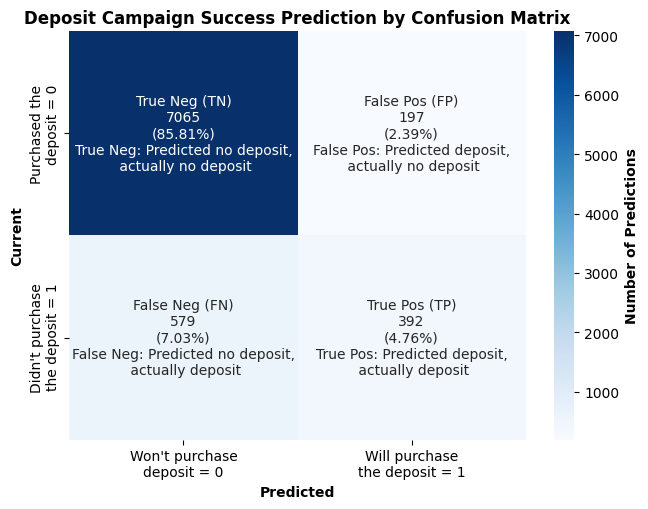

While in the previous step the overall accuracy of 90.48% gave us a first quite good performance general measure
considering overall predictions (regardless of the class), thanks to the confusion matrix we can see there is a poor performance
for some key the class-specific insights of the model showing just 392 over 8233 (a 4.76%) of success for True Positives.
Additionally and after checking the whole process accuracy and the class-level performance -by confusion matrix-,
by going backwards and choosing only 5 features instead of 10, we found there are no improvements when decreasing 
the number of selected variables from 10 to 5 in non of the 2 evaluation methods -accuracy nor c. matrix-.
There's definitelly room for further model optimization in the following steps.



In [217]:
# STEP 12) Logistic Regression model

# 12.D) Evaluation: Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


deposit_cm = confusion_matrix(y_test, y_pred, labels=[0, 1])


group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
group_counts = ["{0:0.0f}".format(value) for value in deposit_cm.flatten()]
group_percentages = ["({0:.2%})".format(value) for value in deposit_cm.flatten() / np.sum(deposit_cm)]

explanations = [
    "True Neg: Predicted no deposit,\n actually no deposit",
    "False Pos: Predicted deposit,\n actually no deposit",
    "False Neg: Predicted no deposit,\n actually deposit",
    "True Pos: Predicted deposit,\n actually deposit"
]

labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in
          zip(group_names, group_counts, group_percentages, explanations)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(deposit_cm, annot=labels, fmt="", cmap="Blues",
                 xticklabels=["Won't purchase\ndeposit = 0", "Will purchase\nthe deposit = 1"],
                 yticklabels=["Purchased the\ndeposit = 0", "Didn't purchase\nthe deposit = 1"],
                 cbar=True)

for t in ax.texts:
    t.set_text(t.get_text().replace("\n", "\n"))
    t.set_ha('center') 

plt.tight_layout()
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Current', fontweight='bold')
plt.title('Deposit Campaign Success Prediction by Confusion Matrix', fontweight='bold')
plt.xticks(rotation=0, ha='center', wrap=True)


cbar = plt.gcf().get_axes()[1]
cbar.set_ylabel('Number of Predictions', fontweight='bold')

plt.show()

TP = deposit_cm[1, 1]  
total_predictions = np.sum(deposit_cm)
TP_percentatge = (TP / total_predictions) * 100

print(f"While in the previous step the overall accuracy of {accuracy:.2%} gave us a first quite good performance general measure\n" 
"considering overall predictions (regardless of the class), thanks to the confusion matrix we can see there is a poor performance\n"
f"for some key the class-specific insights of the model showing just {TP} over {total_predictions} (a {TP_percentatge:.2f}%) of success for True Positives.\n"
"Additionally and after checking the whole process accuracy and the class-level performance -by confusion matrix-,\n" 
"by going backwards and choosing only 5 features instead of 10, we found there are no improvements when decreasing \n"
"the number of selected variables from 10 to 5 in non of the 2 evaluation methods -accuracy nor c. matrix-.\n" 
"There's definitelly room for further model optimization in the following steps.\n")




In [218]:
# STEP 13) Model optimization

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Defining the parameters of the Logistic Regression model we have used that we want to manually adjust
hyperparams = {
"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
"penalty": ["l1", "l2", "elasticnet", None],
"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Initializing the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [219]:
# STEP 13) Model optimization

# 13.A) Find Optimal Hyperparameters using Grid search:

grid.fit(X_train, y_train)

print(f"Best hiperparameters found using Grid method: {grid.best_params_}")

Best hiperparameters found using Grid method: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


In [ ]:
# STEP 13) Model optimization

# 13.B) Testing Accuracy of the hyperparameters found by Grid Search

model_grid = LogisticRegression(penalty = None, C = 0.001, solver = "newton-cg")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

accuracy_diff = grid_accuracy - accuracy

print(f"After manually customizing the parameters using the Grid Search method,\n"
f"we observe a slight improvement (of +{accuracy_diff:.2%}%) in the accuracy after changing hyperparameters based on Grid Search, \n"
f"being now {grid_accuracy:.8} ({grid_accuracy:.2%}), exactly as it before applying Grid Search method\n"
f"(accuracy of {accuracy:.8} ({accuracy:.2%})")

After manually customizing the parameters using the Grid Search method,
we observe a slight improvement (of +0.10%%) in the accuracy after changing hyperparameters based on Grid Search, 
being now 0.90574517 (90.57%), exactly as it before applying Grid Search method
(accuracy of 0.90477347 (90.48%)


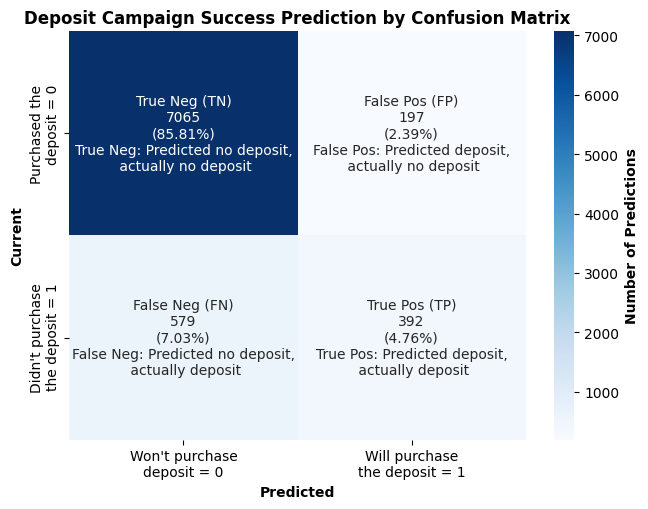

We can observe the confusion matrix performance also perfoms exactly the same than before applying
the Grid Search Hyperparameter method.


In [229]:
# STEP 13) Model optimization

# 13.C) Testing Confusion Matrix of the hyperparameters found with Grid Search:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

deposit_cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
group_counts = ["{0:0.0f}".format(value) for value in deposit_cm.flatten()]
group_percentages = ["({0:.2%})".format(value) for value in deposit_cm.flatten() / np.sum(deposit_cm)]


explanations = [
    "True Neg: Predicted no deposit,\n actually no deposit",
    "False Pos: Predicted deposit,\n actually no deposit",
    "False Neg: Predicted no deposit,\n actually deposit",
    "True Pos: Predicted deposit,\n actually deposit"
]

labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in
          zip(group_names, group_counts, group_percentages, explanations)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(deposit_cm, annot=labels, fmt="", cmap="Blues",
                 xticklabels=["Won't purchase\ndeposit = 0", "Will purchase\nthe deposit = 1"],
                 yticklabels=["Purchased the\ndeposit = 0", "Didn't purchase\nthe deposit = 1"],
                 cbar=True)

for t in ax.texts:
    t.set_text(t.get_text().replace("\n", "\n"))
    t.set_ha('center')  

plt.tight_layout()
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Current', fontweight='bold')
plt.title('Deposit Campaign Success Prediction by Confusion Matrix', fontweight='bold')
plt.xticks(rotation=0, ha='center', wrap=True)


cbar = plt.gcf().get_axes()[1]
cbar.set_ylabel('Number of Predictions', fontweight='bold')

plt.show()

TP = deposit_cm[1, 1]  
total_predictions = np.sum(deposit_cm)
TP_percentatge = (TP / total_predictions) * 100


print(f"We can observe the confusion matrix performance also perfoms exactly the same than before applying\n"
      "the Grid Search Hyperparameter method.")


In [230]:
# STEP 13) Model optimization

# 13.C) Keep adjusting hyperparameters using Rndomized Search:

# Defining the parameters we want to adjust

hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Initializing the hyperparameters random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [231]:
# STEP 13) Model optimization

# 13.D) Identying the best hyperparameters using Randomized Search:

random_search.fit(X_train, y_train)

print(f"Best hiperparameters found using Randomized Search: {random_search.best_params_}")

Best hiperparameters found using Randomized Search: {'solver': 'newton-cg', 'penalty': 'l2', 'C': np.float64(10000.0)}


In [235]:
# STEP 13) Model optimization

# 13.E) Testing Accuracy of the hyperparameters found using Randomized Search:

search_method = "Random Search"
model_random = LogisticRegression(penalty = "l2", C = np.float64(10000.0), solver = "newton-cg")
model_random.fit(X_train, y_train)
y_pred = model_random.predict(X_test)

random_accuracy = accuracy_score(y_test, y_pred)
random_accuracy

print(f"After manually customizing the parameters using {search_method}, we observe\n"
f"exactly the same overall accuracy than with Grid Search, being now {random_accuracy:.8} (a {random_accuracy:.2%}).\n"
"This means that with the means and hyperparameter methods that we have tried so far, we found a local maximum.\n"
"We would then have to repeat the optimization strategy including other hyperparameters to improve the results of the model,\n" 
"since just playing with the penalty, C and solver we are not going to improve the model more than it already is.\n"
"Another option would be recovering some 'aces up the sleeve' found in the EDA process, such as omitting outliers\n"
"and/or values with a higher rates of missng values hidden under 'nonexistent' or 'unknwon'.")

After manually customizing the parameters using Random Search, we observe
exactly the same overall accuracy than with Grid Search, being now 0.90574517 (a 90.57%).
This means that with the means and hyperparameter methods that we have tried so far, we found a local maximum.
We would then have to repeat the optimization strategy including other hyperparameters to improve the results of the model,
since just playing with the penalty, C and solver we are not going to improve the model more than it already is.
Another option would be recovering some 'aces up the sleeve' found in the EDA process, such as omitting outliers
and/or values with a higher rates of missng values hidden under 'nonexistent' or 'unknwon'.
